# <u> Sklearn vs Numpy Linear Regression Implementation </u>


## Comparing numpy implementation of Linear regression using Gradient Descent versus Sklearn:
        

        The idea of this project is to implement linear regression using gradient descent from scratch and
        compare your implementation with pre-built libraries such as scikit-learn.

### Import the required libraries:

In [1]:
%matplotlib inline
import pandas as pd
from sklearn import linear_model
from numpy import *
import matplotlib.pyplot as plt

### Function for computing the squared mean error:

In [2]:
def compute_squared_mean_error(b, m , bmi_life_data):
    total_error = 0
    Y = bmi_life_data[['Life expectancy']]
    N = float(len(Y))
    
    for i in range(0, len(Y)):
        x = bmi_life_data.loc[i, 'BMI']
        y = bmi_life_data.loc[i,'Life expectancy']
        total_error+=(y - (m*x + b))**2 
    return total_error/N

### Function for calculating step gradient descent, i.e. for 1 iteration : 

In [3]:
def step_gradient(current_m, current_b, bmi_life_data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    Y = bmi_life_data[['Life expectancy']]
    N = float(len(Y))
    for i in range (0,len(Y)):
        x = bmi_life_data.loc[i, 'BMI']
        y = bmi_life_data.loc[i,'Life expectancy']
        b_gradient+= -(2/N) * ( y - (current_m*x + current_b))
        m_gradient+= -(2/N) * x * ( y - (current_m*x + current_b))
        
    new_m = current_m - (learning_rate*m_gradient)
    new_b = current_b - (learning_rate * b_gradient)
    return [new_m, new_b]

### Function for calculating gradient descent:

In [4]:

def gradient_descent(bmi_life_data, initial_m, initial_b, learning_rate, num_iteration):
    m = initial_m
    b = initial_b
    
    for i in range(num_iteration):
        m,b = step_gradient(m, b , bmi_life_data , learning_rate)
    return [m,b]


### Function for predicting life expectancies given array of BMIs:

In [5]:
def predict(b,m, x):
    return m*x + b

## Numpy Implementation:



In [15]:
def numpy_implementaion():
    
    bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
    initial_m = 0
    initial_b = 0
    num_iteration  =  2000
    learning_rate = 0.0001
    
    print("Running gradient Descent:")
    print("Starting  with b = {}, m = {}, squared mean error = {}".format(initial_b, initial_m, compute_squared_mean_error(initial_b, initial_m, bmi_life_data)))
    [m,b] =  gradient_descent(bmi_life_data, initial_m, initial_b, learning_rate, num_iteration)
    print("After running  {} iterations,  b = {}, m = {}, squared mean error = {}".format(num_iteration, b, m, compute_squared_mean_error(b, m, bmi_life_data)))
    predict_life_exp = predict(b, m , bmi_life_data[['BMI']].values)
    plt.scatter(bmi_life_data[['BMI']][0:-20], bmi_life_data[['Life expectancy']][0:-20],  color='black')
    plt.plot(bmi_life_data[['BMI']], predict_life_exp , color='b', label = "numpy",linewidth=3)
    plt.xlabel("BMI")
    plt.ylabel("Life expectancy")


Running gradient Descent:
Starting  with b = 0, m = 0, squared mean error = 4933.661669325154
After running  2000 iterations,  b = 0.13876479593524813, m = 2.8017217322127985, squared mean error = 43.4955045004907


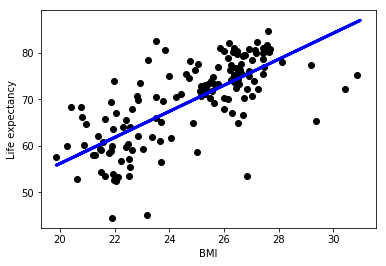

In [16]:
numpy_implementaion()


## Sklearn Implementation:

In [18]:
def sklearn_implementation():
    bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
    lr_model = linear_model.LinearRegression()
    lr_model.fit(bmi_life_data[['BMI']][0:-20], bmi_life_data[['Life expectancy']][0:-20])
    
    predict_life_exp = lr_model.predict(bmi_life_data[['BMI']])
    plt.scatter(bmi_life_data[['BMI']][0:-20], bmi_life_data[['Life expectancy']][0:-20],  color='black')
    plt.plot(bmi_life_data[['BMI']], predict_life_exp , color='r', label = "sklearn",linewidth=3)
    plt.xlabel("BMI")
    plt.ylabel("Life expectancy")


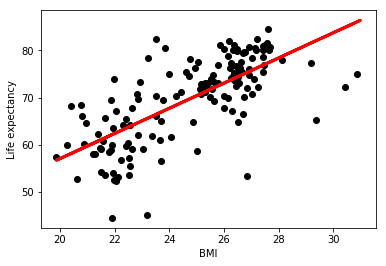

In [19]:
sklearn_implementation()

## Comparing Sklearn and Numpy Implemenation:

Running gradient Descent:
Starting  with b = 0, m = 0, squared mean error = 4933.661669325154
After running  2000 iterations,  b = 0.13876479593524813, m = 2.8017217322127985, squared mean error = 43.4955045004907


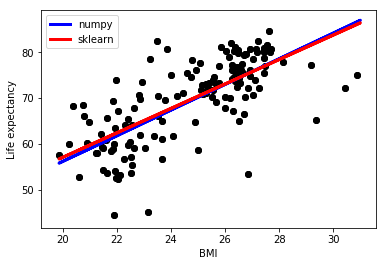

In [21]:
if __name__ == '__main__':
    numpy_implementaion()
    sklearn_implementation()
    plt.legend()
    plt.show()